<a href="https://colab.research.google.com/github/ClaudixoPG/ESI_2025_S1/blob/main/notebooks/analisis_USE_U_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del Cuestionario USE – Subescalas Usefulness y Satisfaction
Este notebook muestra cómo transformar una batería de ítems en métricas agregadas por subescala en el cuestionario USE. Nos enfocaremos en **Usefulness (U1–U8)** y **Satisfaction (S1–S6)**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")


In [2]:
# Cargar archivo Excel desde GitHub
url = "https://raw.githubusercontent.com/ClaudixoPG/ESI_2025_S1/main/datasets/dataset_USE_30items_Likert.xlsx"
df = pd.read_excel(url)
df.head()


,user_id,audience_type,U1,U2,U3,U4,U5,U6,U7,U8,...,EOL1,EOL2,EOL3,EOL4,S1,S2,S3,S4,S5,S6
0,user_1,Experto,3,7,5,1,7,2,4,1,...,7,4,5,7,3,6,1,4,2,4
1,user_2,No experto,2,6,6,6,2,4,6,5,...,7,4,1,6,5,5,2,7,5,2
2,user_3,Experto,1,4,4,4,5,1,5,7,...,3,1,3,5,2,7,2,1,4,7
3,user_4,Experto,1,4,2,1,7,7,6,5,...,5,2,7,7,6,7,3,1,7,7
4,user_5,Experto,2,2,4,5,3,7,7,1,...,5,7,3,3,6,4,2,2,5,6


## Cálculo de Subescalas
Cada subescala se construye como el **promedio de sus ítems individuales**. Ejemplo:
- Usefulness (U1 a U8)
- Satisfaction (S1 a S6)


In [3]:
# Promedios por subescala
df["usefulness"] = df[[f"U{i}" for i in range(1, 9)]].mean(axis=1)
df["satisfaction"] = df[[f"S{i}" for i in range(1, 7)]].mean(axis=1)

df[["usefulness", "satisfaction"]].head()


,usefulness,satisfaction
0,3.750,3.333333
1,4.625,4.333333
2,3.875,3.833333
3,4.125,5.166667
4,3.875,4.166667


In [4]:
# Correlación
corr, p = pearsonr(df["usefulness"], df["satisfaction"])
print(f"Correlación entre Usefulness y Satisfaction: r = {corr:.2f}, p = {p:.4f}")


Correlación entre Usefulness y Satisfaction: r = 0.14, p = 0.2713


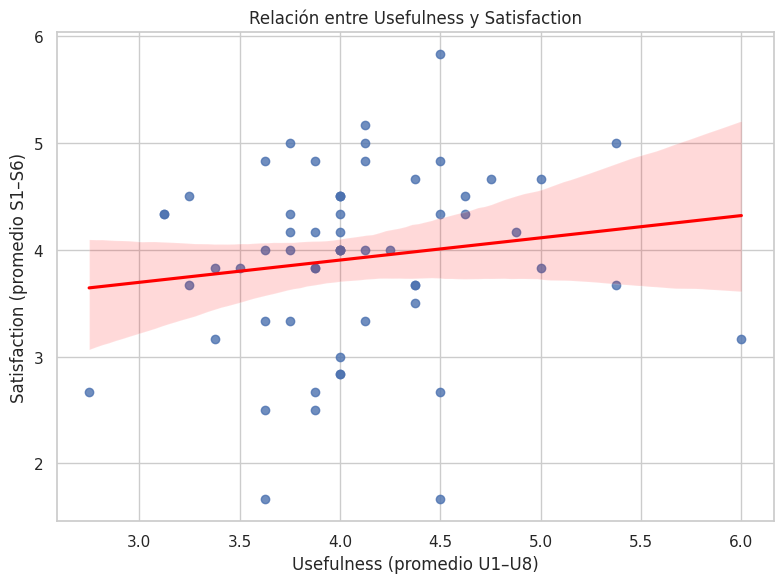

In [5]:
# Scatterplot
plt.figure(figsize=(8, 6))
sns.regplot(x="usefulness", y="satisfaction", data=df, ci=95, line_kws={"color": "red"})
plt.title("Relación entre Usefulness y Satisfaction")
plt.xlabel("Usefulness (promedio U1–U8)")
plt.ylabel("Satisfaction (promedio S1–S6)")
plt.tight_layout()
plt.show()


## Actividad
Realiza los mismos pasos para las subescalas:
- **Ease of Use** (`EOU1` a `EOU12`)
- **Ease of Learning** (`EOL1` a `EOL4`)

Luego, analiza cómo se relacionan con `satisfaction`.

### Interpretación de la Correlación
- El coeficiente de Pearson indica **qué tan fuerte y en qué dirección** se relacionan las variables.
- Un valor cercano a +1 indica una relación positiva fuerte.
- El valor *p* indica si esa relación es estadísticamente significativa.

**Ejemplo:** Si r = 0.65 y p < 0.05, hay una correlación positiva y significativa entre percepción de utilidad y satisfacción.

### Análisis Complementario: ¿Los expertos y no expertos difieren en satisfacción?

In [9]:
# T-Test para comparar satisfacción entre expertos y no expertos
expertos = df[df["audience_type"] == "Experto"]["satisfaction"]
no_expertos = df[df["audience_type"] == "No experto"]["satisfaction"]
t_stat, p_val = ttest_ind(expertos, no_expertos)

print(f"T-Test: diferencia en satisfacción\nT = {t_stat:.2f}, p = {p_val:.4f}")

T-Test: diferencia en satisfacción
T = -0.15, p = 0.8798


### Interpretación del T-Test
- Compara las medias de satisfacción entre usuarios expertos y no expertos.
- Si *p* < 0.05, la diferencia es significativa.
- Este análisis permite detectar si el tipo de público afecta la experiencia reportada.